# Heart Disease Predication
`Author`: [Muhammad Usama Majeed]()\
`Date`: 09-jan-2024\
`Dataset`: [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## Meta-Data
## About Dataset
### Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.
### Content
* Column Descriptions:
* `id` (Unique id for each patient)
* `age `(Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp chest pain type` ([typical angina, atypical angina, non-anginal, asymptomatic])
* `trestbps resting blood pressure` (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs `(if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
*` -- Values:` [normal, stt abnormality, lv hypertrophy]
* `thalach:` maximum heart rate achieved
* `exang:` exercise-induced angina (True/ False)
* `oldpeak:` ST depression induced by exercise relative to rest
* `slope:` the slope of the peak exercise ST segment
* `ca:` number of major vessels (0-3) colored by fluoroscopy
* `thal:` [normal; fixed defect; reversible defect]
* `num: `the predicted attribute
### `Acknowledgements`
#### `Creators`:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### `Relevant Papers:`
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61. 
#### `Citation Request`:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

## Aim's and Ojbective:



### Import libraries:
Let's start the project by importing all the libraries we need.

In [32]:
# Import libraries
# To handle the data 
import pandas as pd
import numpy as np 
# to visualize the data 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
# for scalling of data 
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# testing of model
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict
# metrics
from sklearn.metrics import classification_report, confusion_matrix
# import different models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
# to handle warnings 
import warnings
warnings.filterwarnings('ignore')

### Load the dataset 

In [33]:
#  csv file placed in our local pc 
df = pd.read_csv('heart_disease_uci.csv')
# print first five rowss
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### EXploratory Data Analysis (EDA)
Explore each column

In [34]:
# exploring the datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [35]:
df.shape

(920, 16)

In [36]:
# see id column
df['id'].min(),df['id'].max()

(1, 920)

In [37]:
# now age column
df['age'].min(),df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

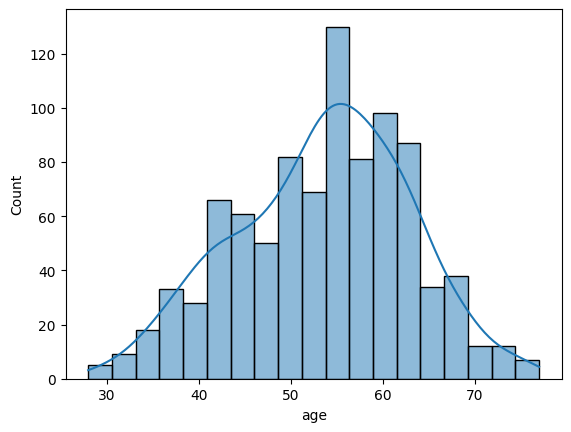

In [38]:
# to visualize the data distribution of age column.
sns.histplot(df['age'],kde=True)

Mean is: 53.51086956521739
Median is: 54.0
Mode is: 54


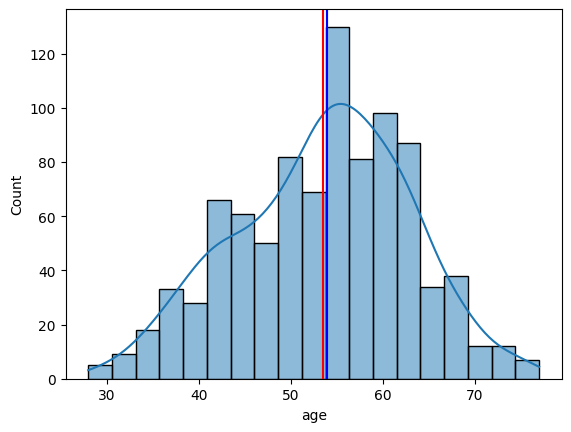

In [39]:
# draw the histplot to see mean median and mode of the age column
sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(),color='red')
plt.axvline(df['age'].median(),color='green')
plt.axvline(df['age'].mode()[0],color='blue')
# print mean median and mode of age column
print('Mean is:',df['age'].mean())
print('Median is:',df['age'].median())
print('Mode is:',df['age'].mode()[0])

#### Let's explore the gender base distribution of age coloumn.

In [40]:
# visualize the distribution of age based on the sex column using plotly 
fig = px.histogram(df, x='age',color='sex')
fig.show()

385


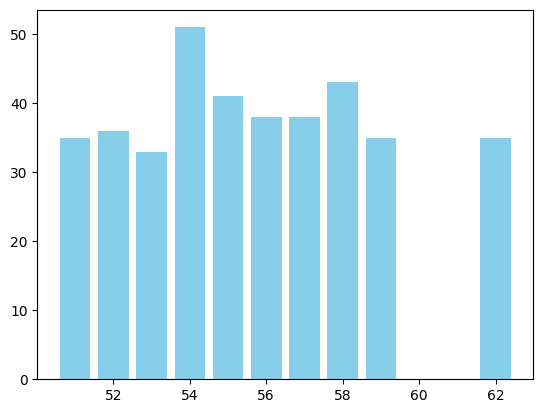

In [41]:
# to see values for each year 
df['age'].value_counts()
age_counts = df['age'].value_counts().head(10)

# Create a bar plot
# top 10 years of age for hert diease in most patients.
plt.bar(age_counts.index, age_counts.values, color='skyblue')
print(age_counts.sum())

In [42]:
# to see age distribution on the based sex 
df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        48      9
        43      9
               ..
Male    77      2
        76      1
        33      1
        28      1
        31      1
Name: count, Length: 91, dtype: int64

<BarContainer object of 2 artists>

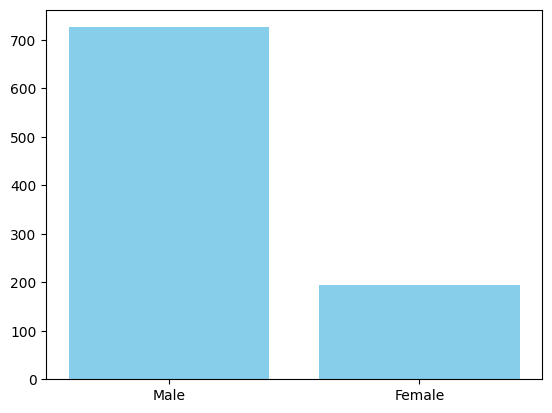

In [43]:
# to find value counts for sex column
heart_disease_ratio =df['sex'].value_counts()
plt.bar(heart_disease_ratio.index,heart_disease_ratio.values,color='skyblue')

In [44]:
# the precentage ratio of male and female in the dataset 
# we draw pie chart using plotly on sex column
fig = px.pie(df,names='sex')
fig.show()

In [45]:
male_count= 726
female_count = 194
total_count= male_count + female_count
precentage_of_male= (male_count/total_count)*100
precentage_of_female= (female_count/total_count)*100
# print the precentage of mmale
print("The percentage of males is: ", precentage_of_male)
# print the precentage of females
print("The percentage of females is: ", precentage_of_female)
# difference 
difference_precentage=(male_count-female_count)/female_count*100
print("The percentage of the difference is: ",difference_precentage,"%")

The percentage of males is:  78.91304347826087
The percentage of females is:  21.086956521739133
The percentage of the difference is:  274.22680412371136 %


dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


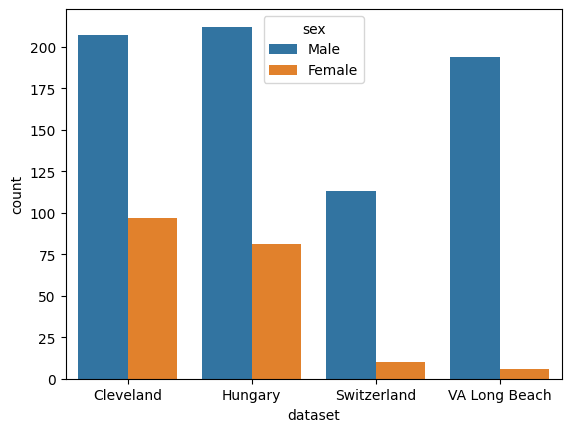

In [46]:
# lets explore dataset column
print(df['dataset'].value_counts())
sns.countplot(df,x='dataset',hue='sex')
fig= px.bar(df,x='dataset',color='sex')
fig.show()
print(df.groupby('sex')['dataset'].value_counts())

In [47]:
fig = px.histogram(df,x='age',color='dataset')
fig.show()
print('Mean of the Datasest', df.groupby('dataset')['age'].mean())
print('----------------------')
print('Median of the dataset:',df.groupby('dataset')['age'].median())
print('----------------------------')
print("mode of the dataset",df.groupby('dataset')['age'].agg(pd.Series.mode))

Mean of the Datasest dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
----------------------
Median of the dataset: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
----------------------------
mode of the dataset dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


 #### Let's explore cp column

In [48]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [49]:
# let's cp column on the base of age 
fig = px.histogram(df,x='age',color='cp')
fig.show()

<Axes: xlabel='cp', ylabel='count'>

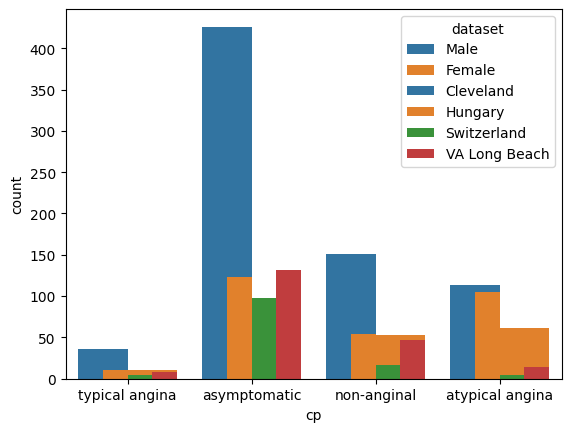

In [50]:
# to viualize the cp behaviour with respect to sex 
sns.countplot(df,x='cp',hue='sex')
sns.countplot(df,x='cp',hue='dataset' )

In [51]:
fig= px.pie(df,names='cp')
fig.show()

#### Let's Explore the trestbps column 
The Normal resting blood pressure is 120/80.


### Dealing with missing values 

In [52]:
df['trestbps'].isnull().sum()/len(df)*100

6.41304347826087

In [53]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [59]:
df['fbs'].value_counts()

fbs
0.000000    692
1.000000    138
0.166265     90
Name: count, dtype: int64

In [61]:
# imputing missing values using iterative imputer of float columns.
df.info() 
imputer = IterativeImputer()
df['trestbps']=imputer.fit_transform(df[['trestbps']])
df['chol']= imputer.fit_transform(df[['chol']])
df['thalch']= imputer.fit_transform(df[['thalch']])
df['ca']= imputer.fit_transform(df[['ca']])
df['oldpeak']=imputer.fit_transform(df[['oldpeak']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    float64
 8   restecg   918 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     611 non-null    object 
 13  ca        920 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(6), int64(3), object(7)
memory usage: 115.1+ KB


### Let's imputer missing values using Ml model

## Outputs 
1. The minimum age of patient is (28) and maximum age is (77).
2. Most of the people got heart diasease at the age of 53-54 years.
3. Most of females and males got heat disease at the age of 54,55 years old.
4. The precentage of female patient is 21.1% and male patient is 78.9%.
5. Males are 274.3% more the in data then female.
6. The highest no of patient are from cleveland is: (304) and lowest from Switzerland (123).
   1. The highest no of females patient are from cleveland (97) and lowest from va long beach (6).
   2. The highest no of males patient are from Hungary (212) and lowest from Switzerland (113).
7. the Average age of cleveland  patients is (54).
8. The Average age of Hungray patients is (47).
9. The Average age of Switzerland patients is (56).
10. The Average age of VA Long Beach is (59).
11. The patient with no symptoms are (54%)
12. The number of patient no angina are (22%).
13. The number of patient with typical angina are (5%).
14. The number of patient with atypical angina are (18.9%)